<a href="https://colab.research.google.com/github/ryanfernald/San-Jose-Employment-Analysis/blob/main/Department_Total_Cash_Compensation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

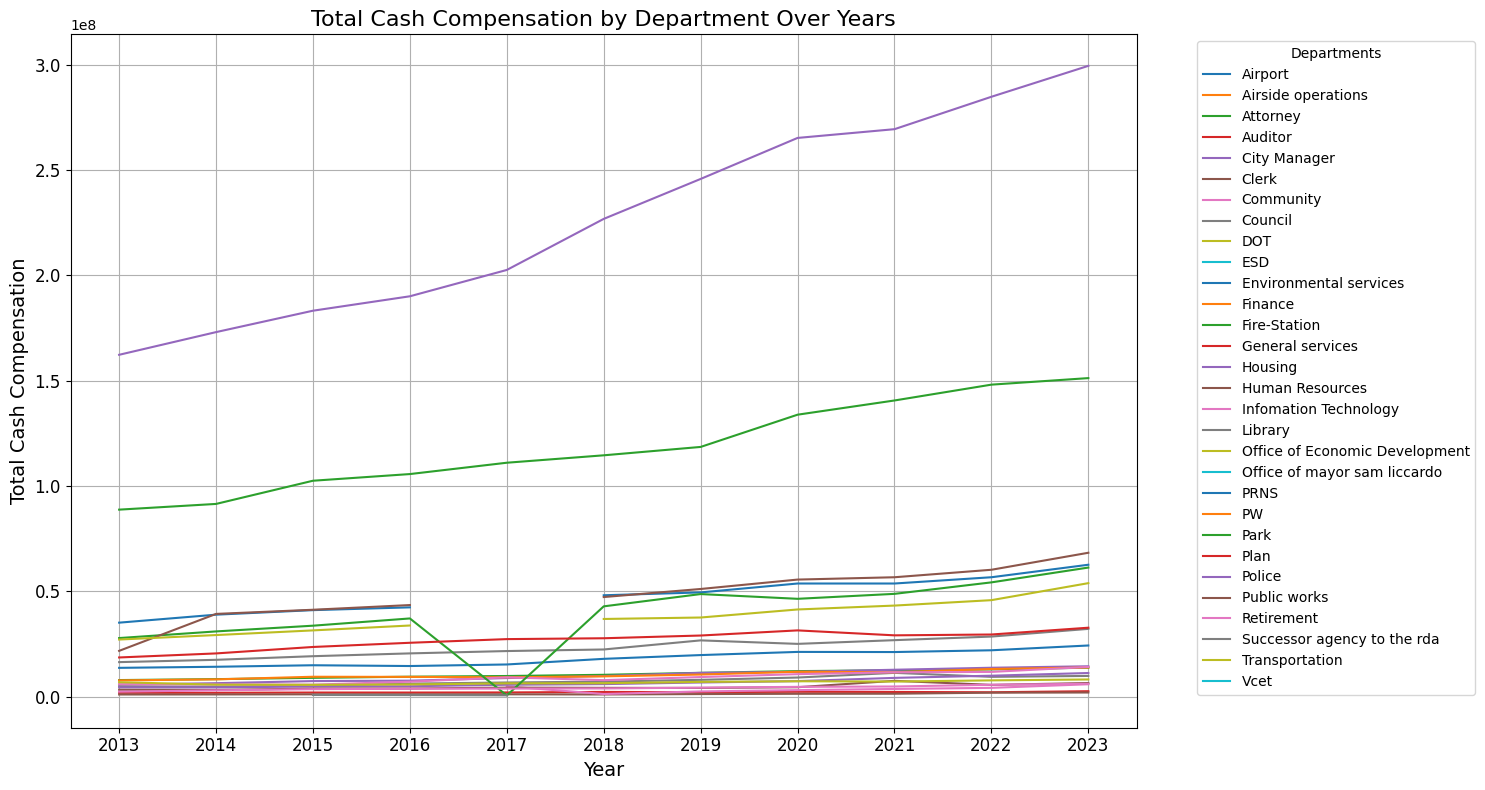

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'sample_data/df_all_years_clean.csv'
df = pd.read_csv(file_path)

def map_to_major_department(department_name):
    department_name = department_name.lower()
    if 'airport' in department_name:
        return 'Airport'
    if 'attorney' in department_name:
        return 'Attorney'
    if 'community' in department_name:
        return 'Community'
    if 'city m' in department_name:
        return 'City Manager'
    if 'auditor' in department_name:
        return 'Auditor'
    if 'council' in department_name:
        return 'Council'
    if 'dot' in department_name:
        return 'DOT'
    if 'esd' in department_name:
        return 'ESD'
    if 'finance' in department_name:
        return 'Finance'
    if 'fire' in department_name:
        return 'Fire-Station'
    if 'housing' in department_name:
        return 'Housing'
    if 'human' in department_name:
        return 'Human Resources'
    if 'independent' in department_name:
        return 'Independent Police Auditor'
    if 'info' in department_name:
        return 'Infomation Technology'
    if 'library' in department_name:
        return 'Library'
    if 'off of econ' in department_name:
        return 'Office of Economic Development'
    if 'prns' in department_name:
        return 'PRNS'
    if 'police' in department_name:
        return 'Police'
    if 'plan' in department_name:
        return 'Plan'
    if 'retire' in department_name:
        return 'Retirement'
    if 'pw' in department_name:
        return 'PW'
    if 'clerk' in department_name:
        return 'Clerk'
    if 'park' in department_name:
        return 'Park'
    if 'office of economic development' in department_name:
        return 'Office of Economic Development'
    return department_name.capitalize()

df['Department Name'] = df['Department'].apply(map_to_major_department)

df_grouped = df.groupby(['Department Name', 'Year'], as_index=False)['Total Cash Compensation'].sum()

df_pivot = df_grouped.pivot(index='Year', columns='Department Name', values='Total Cash Compensation')

def millions_formatter(x, pos):
    return f"${x * 1e-6:.1f}M"

plt.figure(figsize=(15, 8))
for department in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[department], label=department)

plt.xticks(range(2013, 2024), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Cash Compensation by Department Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cash Compensation', fontsize=14)
plt.legend(title='Departments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


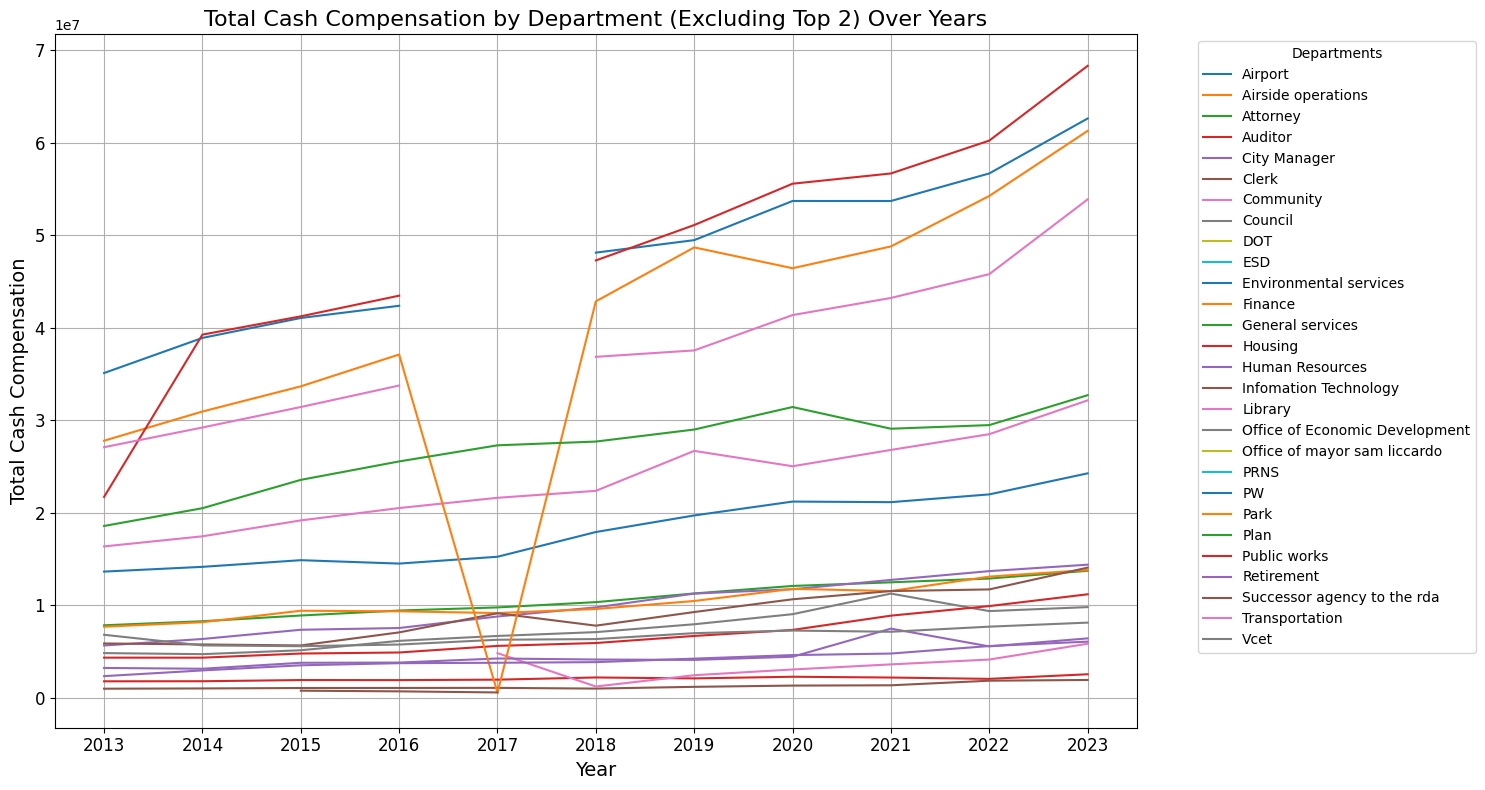

In [ ]:
df['Department Name'] = df['Department'].apply(map_to_major_department)

df_grouped = df.groupby(['Department Name', 'Year'], as_index=False)['Total Cash Compensation'].sum()

total_compensation_by_department = df_grouped.groupby('Department Name')['Total Cash Compensation'].sum()

top_two_departments = total_compensation_by_department.nlargest(2).index

filtered_df_grouped = df_grouped[~df_grouped['Department Name'].isin(top_two_departments)]

df_pivot_filtered = filtered_df_grouped.pivot(index='Year', columns='Department Name', values='Total Cash Compensation')

plt.figure(figsize=(15, 8))
for department in df_pivot_filtered.columns:
    plt.plot(df_pivot_filtered.index, df_pivot_filtered[department], label=department)

plt.xticks(range(2013, 2024), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Cash Compensation by Department (Excluding Top 2) Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cash Compensation', fontsize=14)
plt.legend(title='Departments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()